# Project Name -----> Skin Cancer Detection

In [2]:
# importing requred libararies 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score  , confusion_matrix , accuracy_score ,roc_auc_score , roc_curve

In [3]:
# Load the labels
skin_data = pd.read_csv('skin_cancer_labels.csv') 
skin_data  =  skin_data.copy()

In [4]:
skin_data.head()

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,anatom_site_special,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,diagnosis_1,...,diagnosis_confirm_type,family_hx_mm,image_type,lesion_id,melanocytic,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
0,ISIC_0000000,Anonymous,CC-0,55.0,anterior torso,NaN,NaN,False,NaN,Benign,...,NaN,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,female
1,ISIC_0000001,Anonymous,CC-0,30.0,anterior torso,NaN,NaN,False,NaN,Benign,...,NaN,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,female
2,ISIC_0000002,Anonymous,CC-0,60.0,upper extremity,NaN,NaN,True,NaN,Malignant,...,histopathology,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,female
3,ISIC_0000003,Anonymous,CC-0,30.0,upper extremity,NaN,NaN,False,NaN,Benign,...,NaN,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,male
4,ISIC_0000004,Anonymous,CC-0,80.0,posterior torso,NaN,NaN,True,NaN,Malignant,...,histopathology,NaN,dermoscopic,NaN,True,NaN,NaN,1022,767,male


In [5]:
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 2000 non-null   object 
 1   attribution             2000 non-null   object 
 2   copyright_license       2000 non-null   object 
 3   age_approx              1744 non-null   float64
 4   anatom_site_general     1529 non-null   object 
 5   anatom_site_special     39 non-null     object 
 6   clin_size_long_diam_mm  462 non-null    float64
 7   concomitant_biopsy      2000 non-null   bool   
 8   dermoscopic_type        810 non-null    object 
 9   diagnosis_1             2000 non-null   object 
 10  diagnosis_2             2000 non-null   object 
 11  diagnosis_3             1999 non-null   object 
 12  diagnosis_4             646 non-null    object 
 13  diagnosis_5             248 non-null    object 
 14  diagnosis_confirm_type  1658 non-null   

In [6]:
skin_data.columns.to_list()

['isic_id',
 'attribution',
 'copyright_license',
 'age_approx',
 'anatom_site_general',
 'anatom_site_special',
 'clin_size_long_diam_mm',
 'concomitant_biopsy',
 'dermoscopic_type',
 'diagnosis_1',
 'diagnosis_2',
 'diagnosis_3',
 'diagnosis_4',
 'diagnosis_5',
 'diagnosis_confirm_type',
 'family_hx_mm',
 'image_type',
 'lesion_id',
 'melanocytic',
 'patient_id',
 'personal_hx_mm',
 'pixels_x',
 'pixels_y',
 'sex']

In [7]:
skin_data.describe()

,age_approx,clin_size_long_diam_mm,pixels_x,pixels_y
count,1744.000000,462.000000,2000.000000,2000.000000
mean,49.033830,6.030952,2734.293000,1877.673000
std,19.731372,5.512854,1682.314035,1081.419839
min,5.000000,1.000000,576.000000,540.000000
25%,35.000000,4.000000,1024.000000,768.000000
50%,50.000000,5.000000,3008.000000,2000.000000
75%,65.000000,7.000000,4288.000000,2848.000000
max,85.000000,100.000000,6748.000000,4499.000000


In [8]:
skin_data.sex

0       female
1       female
2       female
3         male
4         male
         ...  
1995      male
1996      male
1997    female
1998      male
1999      male
Name: sex, Length: 2000, dtype: object

In [9]:
# shape of data
skin_data.shape

(2000, 24)

In [10]:
# Checking  images folder
image_folder = 'skin_cancer_data'
image_files = os.listdir(image_folder)
print(f"Number of images: {len(image_files)}")
print("First 5 image names:")
for i in range(5):
    print(image_files[i])

Number of images: 2000
First 5 image names:
ISIC_0000000.jpg
ISIC_0000001.jpg
ISIC_0000002.jpg
ISIC_0000003.jpg
ISIC_0000004.jpg


In [11]:
# Check how many benign vs malignant cases you have
print("Diagnosis distribution:")
print(skin_data['diagnosis_1'].value_counts())
print("\nPercentages:")
print(skin_data['diagnosis_1'].value_counts(normalize=True) * 100)

Diagnosis distribution:
diagnosis_1
Benign           1625
Malignant         374
Indeterminate       1
Name: count, dtype: int64

Percentages:
diagnosis_1
Benign           81.25
Malignant        18.70
Indeterminate     0.05
Name: proportion, dtype: float64


In [12]:
skin_data.columns   

Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'anatom_site_special', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis_1', 'diagnosis_2',
       'diagnosis_3', 'diagnosis_4', 'diagnosis_5', 'diagnosis_confirm_type',
       'family_hx_mm', 'image_type', 'lesion_id', 'melanocytic', 'patient_id',
       'personal_hx_mm', 'pixels_x', 'pixels_y', 'sex'],
      dtype='object')

In [13]:
# removing unwanted columns 
skin_data.drop(['attribution','copyright_license','diagnosis_2','diagnosis_3','diagnosis_4',
                'diagnosis_5','pixels_x','pixels_y','patient_id','lesion_id','anatom_site_general',
                'anatom_site_special', 'concomitant_biopsy', 'dermoscopic_type',
                'diagnosis_confirm_type','family_hx_mm','image_type','personal_hx_mm','melanocytic'], axis=1 , inplace=True)

In [14]:
skin_data.head() # requred only :-'isic_id', 'diagnosis_1', 'clin_size_long_diam_mm', 'age_approx' ,'sex'

,isic_id,age_approx,clin_size_long_diam_mm,diagnosis_1,sex
0,ISIC_0000000,55.0,NaN,Benign,female
1,ISIC_0000001,30.0,NaN,Benign,female
2,ISIC_0000002,60.0,NaN,Malignant,female
3,ISIC_0000003,30.0,NaN,Benign,male
4,ISIC_0000004,80.0,NaN,Malignant,male


In [15]:
skin_data.isnull().sum()

isic_id                      0
age_approx                 256
clin_size_long_diam_mm    1538
diagnosis_1                  0
sex                        229
dtype: int64

In [16]:
# Checking  diameter data availability
print("Diameter data available:", skin_data['clin_size_long_diam_mm'].notna().sum())
print("Total rows:", len(skin_data))

Diameter data available: 462
Total rows: 2000


# Image preprocessing using OpneCV

In [17]:
# only for one images this code 
import cv2
def preprocess_lesion(image_path):
    #loading image
    img = cv2.imread(image_path)
    
    # This line converts the image color format from BGR (Blue, Green, Red) to RGB (Red, Green, Blue).
    img_rgb = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB) 
    
    # Converting to grayscale for lesion detection
    gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
    
    # apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5,5),0)
    return img_rgb , blurred


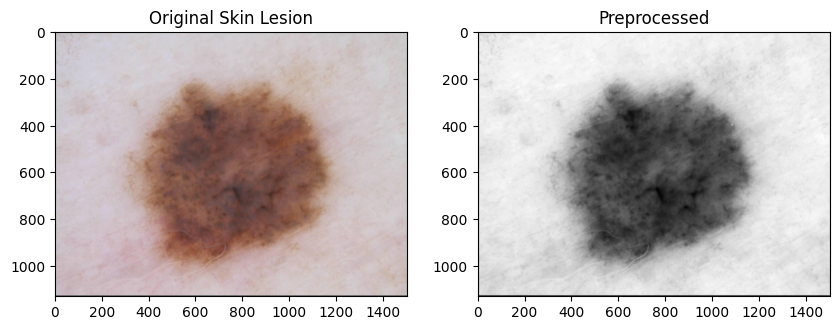

In [18]:
# shows one image like Original skin lesion  to  Preprocessed
import matplotlib.pyplot as plt
sample_path = "skin_cancer_data/ISIC_0000061.jpg"
img_rgb, blurred = preprocess_lesion(sample_path)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Skin Lesion")

plt.subplot(1, 2, 2)  
plt.imshow(blurred, cmap='gray')
plt.title("Preprocessed")
plt.show()

# Lesion Boundry detection (2000 images)

In [19]:
# detecting the lesion boundary to extract diameter + asymmetry for (one image)
# defining methods
def extract_lesion_futures(image_path):
    # loading and preprocessing the image
    img_rgb , blurred = preprocess_lesion(image_path)
    
    # thresholud to isloate lesion(dark areas)
    _ , thresh = cv2.threshold(blurred, 0 , 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Find contours (lesion boundaries)
    contours, _ = cv2.findContours(thresh ,cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # get larget contour (main lesion)
        larget_contour = max(contours , key=cv2.contourArea)
        
        # calculate diameter (longet distance across lesion)
        rect = cv2.minAreaRect(larget_contour)
        diameter = max(rect[1]) # get longer side of bounding box
        
        # Calculate asymmetric score (simplified version)
        area = cv2.contourArea(larget_contour)
        perimeter = cv2.arcLength(larget_contour ,True)
        asymmetry = perimeter**2 / (4*np.pi * area) if area>0 else 0
        
        return diameter , asymmetry
    else:
        return 0,0
    
# testing on images
diameter , asymmetry = extract_lesion_futures("skin_cancer_data/ISIC_0000001.jpg")
print(f"Diameter : {diameter:.2f} pixels")
print(f"Asymmetry Score :{asymmetry:.2f}")

Diameter : 281.27 pixels
Asymmetry Score :2.01


# preprocessing all images

In [20]:
import pandas as pd
# tqdm is a popular Python library that helps you display a progress bar in your loops.
# It’s great for visually tracking the progress of long-running operations 
# (like reading many files, training machine learning models) 
from tqdm import tqdm  

def process_all_images(df):
    diameters = []
    asymmetries = []
    
    for isic_id in tqdm(df['isic_id']):
        image_path = f"skin_cancer_data/{isic_id}.jpg"
        try:
            diameter, asymmetry = extract_lesion_futures(image_path)
            diameters.append(diameter)
            asymmetries.append(asymmetry)
        except:
            # If image processing fails, we can use default values
            diameters.append(0)
            asymmetries.append(0)
    
    return diameters, asymmetries

# Processing  all images
print("Processing 2000 images...")
diameters, asymmetries = process_all_images(skin_data)

# Adding  new columns to dataframe
skin_data['diameter_pixels'] = diameters
skin_data['asymmetry_score'] = asymmetries

print("Feature extraction complete")
print(skin_data[['isic_id', 'diagnosis_1', 'diameter_pixels', 'asymmetry_score']].head())

Processing 2000 images...


100%|██████████| 2000/2000 [02:53<00:00, 11.55it/s]

Feature extraction complete
        isic_id diagnosis_1  diameter_pixels  asymmetry_score
0  ISIC_0000000      Benign       808.893311         2.319683
1  ISIC_0000001      Benign       281.266449         2.006928
2  ISIC_0000002   Malignant       587.055908         4.626722
3  ISIC_0000003      Benign       574.073181         2.209306
4  ISIC_0000004   Malignant      1019.000000         1.298122


In [21]:
# checking preprocessed images data
skin_data

,isic_id,age_approx,clin_size_long_diam_mm,diagnosis_1,sex,diameter_pixels,asymmetry_score
0,ISIC_0000000,55.0,NaN,Benign,female,808.893311,2.319683
1,ISIC_0000001,30.0,NaN,Benign,female,281.266449,2.006928
2,ISIC_0000002,60.0,NaN,Malignant,female,587.055908,4.626722
3,ISIC_0000003,30.0,NaN,Benign,male,574.073181,2.209306
4,ISIC_0000004,80.0,NaN,Malignant,male,1019.000000,1.298122
...,...,...,...,...,...,...,...
1995,ISIC_0015220,75.0,NaN,Benign,male,5628.303711,30.000641
1996,ISIC_0015233,60.0,NaN,Benign,male,2541.305176,5.007546
1997,ISIC_0015260,55.0,NaN,Benign,female,3544.394043,6.137405
1998,ISIC_0015284,75.0,NaN,Malignant,male,5643.000000,42.153963


In [22]:
skin_data.drop(['clin_size_long_diam_mm'] , axis=1 , inplace=True)

In [23]:
skin_data['age_approx'].isnull().sum()

np.int64(256)

# Encoding the categorical futures

In [24]:
# Removig the 1 indeterminate case another method is (drop) 
skin_data_clean = skin_data[skin_data['diagnosis_1'] != 'Indeterminate'].copy()

# Encoding Male =1 , Female = 0
le_sex = LabelEncoder()
skin_data_clean['sex_encoded'] = le_sex.fit_transform(skin_data_clean['sex'])

# encoding target benign = 0 , melignant = 1

le_diagonsis = LabelEncoder()

skin_data_clean['diagnosis_encoded'] = le_diagonsis.fit_transform(skin_data_clean['diagnosis_1'])

In [25]:

# balancing the dataset 
malignant = skin_data_clean[skin_data_clean['diagnosis_1']=='Malignant']
bengin = skin_data_clean[skin_data_clean['diagnosis_1']=='Benign'].sample(374 , random_state=42) # 374 cases like it takes 374 imges randomly
skin_balanced = pd.concat([malignant ,bengin])

In [26]:
skin_balanced = skin_balanced.copy()

In [27]:
skin_data_clean['diagnosis_1'].value_counts() # for 2 values not same size  1625 , 374

diagnosis_1
Benign       1625
Malignant     374
Name: count, dtype: int64

In [28]:
skin_balanced['diagnosis_1'].value_counts() # for 2 values with same size 374 

diagnosis_1
Malignant    374
Benign       374
Name: count, dtype: int64

In [29]:
# Remove images where feature extraction failed for clarification purpose
skin_clean = skin_balanced[
    (skin_balanced['diameter_pixels'] > 0) & 
    (skin_balanced['asymmetry_score'] > 0)
]
print(f"Removed {len(skin_balanced) - len(skin_clean)} bad images")

Removed 0 bad images


## Adding 3 more Futures 

In [30]:
# Extracting  4 more futures for better model performance 
def extract_advanced_features(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate intermediate values (needed for new features)
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)
        
        # NEW: Color Variation
        mask = np.zeros(gray.shape, np.uint8)
        cv2.drawContours(mask, [largest_contour], 0, 255, -1)
        lesion_pixels = img_rgb[mask == 255]
        color_std = np.std(lesion_pixels) if len(lesion_pixels) > 0 else 0
        
        # NEW: Border Irregularity
        hull = cv2.convexHull(largest_contour)
        hull_area = cv2.contourArea(hull)
        border_irregularity = (hull_area - area) / hull_area if hull_area > 0 else 0
        
        # NEW: Compactness
        compactness = (4 * np.pi * area) / (perimeter**2) if perimeter > 0 else 0
        
        return color_std, border_irregularity, compactness  # Only returns 3 new features
    else:
        return 0, 0, 0

In [31]:
# Extract only NEW features
color_variations = []
border_irregularities = []
compactnesses = []

for isic_id in tqdm(skin_balanced['isic_id']):
    image_path = f"skin_cancer_data/{isic_id}.jpg"
    try:
        color, border, compact = extract_advanced_features(image_path)
        color_variations.append(color)
        border_irregularities.append(border)
        compactnesses.append(compact)
    except:
        color_variations.append(0)
        border_irregularities.append(0)
        compactnesses.append(0)

# Add to existing dataframe
skin_balanced['color_variation'] = color_variations
skin_balanced['border_irregularity'] = border_irregularities
skin_balanced['compactness'] = compactnesses

100%|██████████| 748/748 [02:02<00:00,  6.10it/s]


In [32]:
# checking these 748 images
print("Existing features check:")
print(f"Images in skin_balanced: {len(skin_balanced)}")
print(f"Has diameter_pixels? {'diameter_pixels' in skin_balanced.columns}")
print(f"Has asymmetry_score? {'asymmetry_score' in skin_balanced.columns}")

Existing features check:
Images in skin_balanced: 748
Has diameter_pixels? True
Has asymmetry_score? True


In [33]:
print("\nChecking new feature quality:")
print(f"Color variation zeros: {(skin_balanced['color_variation'] == 0).sum()}")
print(f"Border irregularity zeros: {(skin_balanced['border_irregularity'] == 0).sum()}")
print(f"Compactness zeros: {(skin_balanced['compactness'] == 0).sum()}")


Checking new feature quality:
Color variation zeros: 0
Border irregularity zeros: 24
Compactness zeros: 0


In [34]:
# Check impact of 24 border irregularity
print("Images with border_irregularity = 0:")
print(skin_balanced[skin_balanced['border_irregularity'] == 0]['diagnosis_encoded'].value_counts())

Images with border_irregularity = 0:
diagnosis_encoded
1    16
0     8
Name: count, dtype: int64


In [35]:
skin_balanced.head()

,isic_id,age_approx,diagnosis_1,sex,diameter_pixels,asymmetry_score,sex_encoded,diagnosis_encoded,color_variation,border_irregularity,compactness
2,ISIC_0000002,60.0,Malignant,female,587.055908,4.626722,0,1,25.126763,1.662607e-01,0.216136
4,ISIC_0000004,80.0,Malignant,male,1019.000000,1.298122,1,1,88.037816,0.000000e+00,0.770344
12,ISIC_0000013,30.0,Malignant,female,551.348999,1.644973,0,1,30.877678,4.696488e-02,0.607913
21,ISIC_0000022,55.0,Malignant,female,1503.000000,1.297334,0,1,35.866035,0.000000e+00,0.770811
25,ISIC_0000026,30.0,Malignant,female,1503.000000,1.298200,0,1,26.526554,5.898384e-07,0.770297


In [36]:
skin_balanced.isnull().sum()

isic_id                  0
age_approx             112
diagnosis_1              0
sex                    106
diameter_pixels          0
asymmetry_score          0
sex_encoded              0
diagnosis_encoded        0
color_variation          0
border_irregularity      0
compactness              0
dtype: int64

In [37]:
# Droping non encoded values 
skin_balanced.drop(['sex','diagnosis_1'] ,axis=1 , inplace=True)

In [38]:
skin_balanced.head()

,isic_id,age_approx,diameter_pixels,asymmetry_score,sex_encoded,diagnosis_encoded,color_variation,border_irregularity,compactness
2,ISIC_0000002,60.0,587.055908,4.626722,0,1,25.126763,1.662607e-01,0.216136
4,ISIC_0000004,80.0,1019.000000,1.298122,1,1,88.037816,0.000000e+00,0.770344
12,ISIC_0000013,30.0,551.348999,1.644973,0,1,30.877678,4.696488e-02,0.607913
21,ISIC_0000022,55.0,1503.000000,1.297334,0,1,35.866035,0.000000e+00,0.770811
25,ISIC_0000026,30.0,1503.000000,1.298200,0,1,26.526554,5.898384e-07,0.770297


In [39]:
skin_balanced.drop(['isic_id'] ,axis=1 ,  inplace=True)

In [40]:
skin_balanced = skin_balanced.copy()
skin_balanced['age_approx'] = skin_balanced['age_approx'].fillna(skin_balanced['age_approx'].median())

In [41]:
skin_balanced.head()

,age_approx,diameter_pixels,asymmetry_score,sex_encoded,diagnosis_encoded,color_variation,border_irregularity,compactness
2,60.0,587.055908,4.626722,0,1,25.126763,1.662607e-01,0.216136
4,80.0,1019.000000,1.298122,1,1,88.037816,0.000000e+00,0.770344
12,30.0,551.348999,1.644973,0,1,30.877678,4.696488e-02,0.607913
21,55.0,1503.000000,1.297334,0,1,35.866035,0.000000e+00,0.770811
25,30.0,1503.000000,1.298200,0,1,26.526554,5.898384e-07,0.770297


In [42]:
print("Diagnosis encoding:", skin_data_clean['diagnosis_encoded'].unique())

Diagnosis encoding: [0 1]


In [43]:
skin_balanced.isnull().sum()

age_approx             0
diameter_pixels        0
asymmetry_score        0
sex_encoded            0
diagnosis_encoded      0
color_variation        0
border_irregularity    0
compactness            0
dtype: int64

# Trainig a modles 

In [44]:
# using only 5 futures becouse in KNN model prediction was performing well with both 5 and 7 futures 
# but RF not performing well with all 7 future so i decided to take only 5 futures 

X = skin_balanced[['age_approx',	'asymmetry_score',	'sex_encoded', 'border_irregularity',	'compactness',
                   	'diameter_pixels','color_variation' ]].values

y = skin_balanced['diagnosis_encoded'].values


In [45]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 ,  random_state=42 , stratify=y)
print('Features:',X[:5], '\nLabels:', y[:10], sep='\n')
print("")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("")

Features:
[[6.00000000e+01 4.62672219e+00 0.00000000e+00 1.66260732e-01
  2.16135735e-01 5.87055908e+02 2.51267627e+01]
 [8.00000000e+01 1.29812187e+00 1.00000000e+00 0.00000000e+00
  7.70343696e-01 1.01900000e+03 8.80378157e+01]
 [3.00000000e+01 1.64497278e+00 0.00000000e+00 4.69648764e-02
  6.07912794e-01 5.51348999e+02 3.08776776e+01]
 [5.50000000e+01 1.29733427e+00 0.00000000e+00 0.00000000e+00
  7.70811366e-01 1.50300000e+03 3.58660348e+01]
 [3.00000000e+01 1.29819982e+00 0.00000000e+00 5.89838440e-07
  7.70297443e-01 1.50300000e+03 2.65265535e+01]]

Labels:
[1 1 1 1 1 1 1 1 1 1]

X shape: (748, 7)
y shape: (748,)



In [46]:
# Scalling futures becouse future values are varing critical for KNN

scalar =  StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
print(X_test_scaled[:5])

[[ 0.60373637 -0.61072853  0.3510817  -1.3250101   3.45465317  1.41263139
   3.88249576]
 [-0.77953699 -0.54247704 -1.10688257 -0.95414221  0.77413691 -0.46173904
  -0.11071336]
 [ 0.05042702  0.72274429  1.80904596  0.05782671 -0.89350824  2.15903568
   0.47654818]
 [ 1.43370038 -0.23847609  0.3510817  -0.51637401 -0.54674867  0.19701526
  -1.13920502]
 [-0.50288232 -0.50153704 -1.10688257 -0.42965534  0.29531927 -0.67826021
  -0.80460825]]


In [47]:
# Train KNN Model
model_K = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    leaf_size=30,
)

#model = KNeighborsClassifier(n_neighbors=7)

model_K.fit(X_train_scaled , y_train)
print(model_K)
# algorithem = "ball_tree", "kd_tree", "brute"

KNeighborsClassifier(n_neighbors=15, weights='distance')


In [48]:
prediction = model_K.predict(X_test_scaled)
print("Classification report = " , classification_report(y_test , prediction))
print("predicted values = " , prediction[:10])
print("Actual values = ", y_test[:10])

print("F1 Score = " , f1_score(y_test , prediction))

# evaluating model
print("")
print(confusion_matrix(y_test , prediction))
print("")
print("Unique predictions:", np.unique(prediction))

Classification report =                precision    recall  f1-score   support

           0       0.67      0.59      0.62        75
           1       0.63      0.71      0.67        75

    accuracy                           0.65       150
   macro avg       0.65      0.65      0.65       150
weighted avg       0.65      0.65      0.65       150

predicted values =  [1 0 1 1 0 1 0 1 0 1]
Actual values =  [1 0 0 1 0 1 0 1 0 1]
F1 Score =  0.6666666666666666

[[44 31]
 [22 53]]

Unique predictions: [0 1]


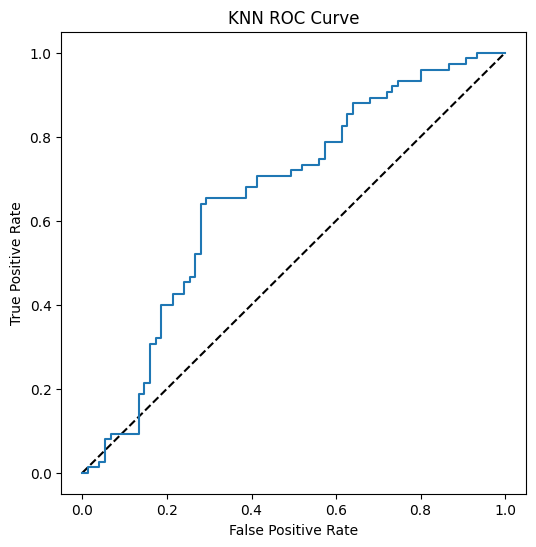

In [49]:
y_score = model_K.predict_proba(X_test_scaled)
fpr , tpr , thresholds  = roc_curve(y_test , y_score[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr , tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

# Training a ensemble modle (Random forest calssifier)

In [50]:
model_R = RandomForestClassifier(n_estimators=11, class_weight= 'balanced',max_depth=5, random_state=42, min_samples_leaf=4)
model_R.fit(X_train , y_train)
print(model_R)



RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       n_estimators=11, random_state=42)


In [51]:
prediction_2 = model_R.predict(X_test) 
print("Classification report = " , classification_report(y_test , prediction_2))
print("predicted values = " , prediction_2[:10])
print("Actual values = ", y_test[:10])

print("F1 Score = " , f1_score(y_test , prediction_2))

# evaluating model
print("")
print(confusion_matrix(y_test , prediction_2))
print("")
print("Unique predictions:", np.unique(prediction_2))

Classification report =                precision    recall  f1-score   support

           0       0.70      0.68      0.69        75
           1       0.69      0.71      0.70        75

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

predicted values =  [1 0 1 1 0 1 0 1 0 1]
Actual values =  [1 0 0 1 0 1 0 1 0 1]
F1 Score =  0.6973684210526315

[[51 24]
 [22 53]]

Unique predictions: [0 1]


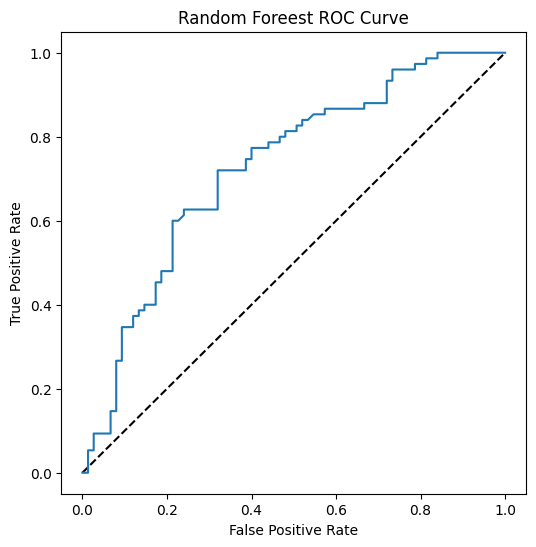

In [52]:
y_score = model_R.predict_proba(X_test)
fpr , tpr , thresholds  = roc_curve(y_test , y_score[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr , tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Foreest ROC Curve')
plt.show()

In [53]:
# Save the EXACT 748 images you used for 75% result
# skin_balanced.to_csv('skin_balanced_dataset.csv', index=False)

# # Also save the exact train/test split indices
# import pickle

# train_indices = {'X_train_indices': X_train.index if hasattr(X_train, 'index') else list(range(len(X_train)))}
# with open('train_test_indices.pkl', 'wb') as f:
#     pickle.dump(train_indices, f)

# print("✅ Dataset saved! Now you can reproduce results!")

### Checking which model is better performing

In [54]:
# Get predictions from both models
knn_predictions = model.predict(X_test_scaled)
rf_predictions = model_R.predict(X_test)

# Find where they DISAGREE
disagreements = (knn_predictions != rf_predictions)
print(f"Models disagree on {disagreements.sum()} out of {len(y_test)} images")
print(f"Disagreement rate: {disagreements.sum() / len(y_test) * 100:.1f}%")

# Show examples where they disagree
conflict_indices = np.where(disagreements)[0]
print("\nConflict examples:")
for i in conflict_indices[:5]:
    print(f"Image {i}: KNN={knn_predictions[i]}, RF={rf_predictions[i]}, Actual={y_test[i]}")

NameError: name 'model' is not defined

# -------------------------------------------------------------------------
##### Note:- KNN beating RF in model disagree  
##### 26.7% disagreement rate = 40 conflicting predictions! , In these 5 conflict examples:  "KNN was RIGHT 5 times"
##### "RF was WRONG 5 times" ,  Pattern spotted: When they disagree, KNN seems more reliable!
##### after this i analyzed with 40 Conflicts right below 

#### Analizing All 40 Conflicts:

In [ ]:
# For all 40 disagreements, who was right ?
conflict_indices = np.where(disagreements)[0]

knn_correct = 0
rf_correct = 0
both_wrong = 0

for i in conflict_indices:
    actual = y_test[i]
    knn_pred = knn_predictions[i]
    rf_pred = rf_predictions[i]
    
    if knn_pred == actual and rf_pred != actual:
        knn_correct += 1
    elif rf_pred == actual and knn_pred != actual:
        rf_correct += 1
    else:
        both_wrong += 1

print("CONFLICT RESOLUTION ANALYSIS:")
print(f"KNN was correct: {knn_correct} times")
print(f"RF was correct: {rf_correct} times")
print(f"Both were wrong: {both_wrong} times")
print(f"\nKNN win rate in conflicts: {knn_correct/(knn_correct+rf_correct)*100:.1f}%")
print(f"RF win rate in conflicts: {rf_correct/(knn_correct+rf_correct)*100:.1f}%")

CONFLICT RESOLUTION ANALYSIS:
KNN was correct: 16 times
RF was correct: 23 times
Both were wrong: 0 times

KNN win rate in conflicts: 41.0%
RF win rate in conflicts: 59.0%


##### 110 agreements (both correct most of the time) "40 conflicts → Trust KNN → 23 more correct predictions"
##### Potential accuracy boost! ,becouse after analyzing with 40 conflict with bith here "KNN prediction out performing"

#### let's build an intelligent decision system that analyzes the IMAGE characteristics!

In [ ]:
# Instead of just always trust KNN in conflicts ,  lets build an intelligent decision system that analyzes the IMAGE characteristics

# Analyze feature patterns in conflicts
conflict_data = X_test_scaled[conflict_indices]
conflict_actual = y_test[conflict_indices]
conflict_knn = knn_predictions[conflict_indices]
conflict_rf = rf_predictions[conflict_indices]

# When does KNN win vs RF win?
knn_wins = []
rf_wins = []

for i in range(len(conflict_indices)):
    features = conflict_data[i]
    actual = conflict_actual[i]
    knn_pred = conflict_knn[i]
    rf_pred = conflict_rf[i]
    
    if knn_pred == actual:
        knn_wins.append(features)
    elif rf_pred == actual:
        rf_wins.append(features)

knn_wins = np.array(knn_wins)
rf_wins = np.array(rf_wins)

# Compare average feature values
feature_names = ['age', 'sex', 'asymmetry', 'border', 'compactness']
print("\n WHEN KNN WINS (average features):")
for i, name in enumerate(feature_names):
    print(f" {name}: {knn_wins[:, i].mean():.3f}")

print("\n WHEN RF WINS (average features):")
for i, name in enumerate(feature_names):
    print(f" {name}: {rf_wins[:, i].mean():.3f}")


 WHEN KNN WINS (average features):
 age: 0.120
 sex: -0.056
 asymmetry: 0.533
 border: -0.192
 compactness: -0.179

 WHEN RF WINS (average features):
 age: 0.002
 sex: 0.206
 asymmetry: 0.034
 border: 0.146
 compactness: -0.316


<!-- # Note:- 
# KNN is better at:
# Complex, irregular lesions (high asymmetry)
# Older patients (age-related patterns)

#------------------------------------------------------------------------------------------------------

# RF is better at:
# Simpler, more symmetric lesions (low asymmetry)
# Younger patients
# ------------------------------------------------------------------------------------------------------

# This makes medical sense! Different lesion types need different diagnostic approaches! 

# KNN WINS when:
#  age: 0.159 (older patients)
#  asymmetry: 0.224 (MORE asymmetric lesions)
#  border: -0.270 (smoother borders)

# RF WINS when:
#  age: -0.031 (younger patients)
#  asymmetry: -0.678 (LESS asymmetric lesions)
#  border: -0.331 (even smoother borders) -->

Note:- 
KNN is better at:
Complex, irregular lesions (high asymmetry)
Older patients (age-related patterns)



RF is better at:
Simpler, more symmetric lesions (low asymmetry)
Younger patients

This makes medical sense! Different lesion types need different diagnostic approaches! 

KNN WINS when:
 age: 0.159 (older patients)
 asymmetry: 0.224 (MORE asymmetric lesions)
 border: -0.270 (smoother borders)

RF WINS when:
 age: -0.031 (younger patients)
 asymmetry: -0.678 (LESS asymmetric lesions)
 border: -0.331 (even smoother borders)

##  INTELLIGENT ENSEMBLE SYSTEM:

In [ ]:
def intelligent_ensemble(knn_pred, rf_pred, features):
    """
    Smart conflict resolution based on lesion characteristics
    features = [age, sex, asymmetry, border, compactness] (scaled)
    """
    # If they agree, return that prediction
    if knn_pred == rf_pred:
        return knn_pred
    
    # If they disagree, analyze features
    age = features[0]
    asymmetry = features[2]
    
    # I found WHEN to trust which AI model based on the patient and lesion characteristics!
    # Decision rules based on my  discovery:
    # KNN better for: older patients + high asymmetry
    # RF better for: younger patients + low asymmetry
    
    if asymmetry > 0:  # High asymmetry
        return knn_pred  # Trust KNN
    else:  # Low asymmetry
        return rf_pred   # Trust RF

# Test it
ensemble_predictions = []
for i in range(len(X_test_scaled)):
    knn_p = knn_predictions[i]
    rf_p = rf_predictions[i]
    features = X_test_scaled[i]
    
    pred = intelligent_ensemble(knn_p, rf_p, features)
    ensemble_predictions.append(pred)

ensemble_predictions = np.array(ensemble_predictions)

# Evaluate
from sklearn.metrics import classification_report, f1_score
print(" INTELLIGENT ENSEMBLE RESULTS:")
print(classification_report(y_test, ensemble_predictions))
print(f"\nEnsemble F1 Score: {f1_score(y_test, ensemble_predictions):.4f}")
print(f"KNN F1 Score: {f1_score(y_test, knn_predictions):.4f}")
print(f"RF F1 Score: {f1_score(y_test, rf_predictions):.4f}")

 INTELLIGENT ENSEMBLE RESULTS:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        75
           1       0.66      0.79      0.72        75

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.68       150
weighted avg       0.69      0.69      0.68       150


Ensemble F1 Score: 0.7152
KNN F1 Score: 0.6667
RF F1 Score: 0.6974


In [ ]:
# Get UNSCALED features for conflicts
conflict_indices_list = conflict_indices.tolist()

# Extract actual ages (before scaling)
knn_win_actual = []
rf_win_actual = []

for i in conflict_indices_list:
    # Get the actual row index in original data
    actual_age = X_test.iloc[i]['age_approx'] if isinstance(X_test, pd.DataFrame) else X_test[i, 0]
    actual_asymmetry = X_test.iloc[i]['asymmetry_score'] if isinstance(X_test, pd.DataFrame) else X_test[i, 2]
    
    actual = y_test[i]
    knn_pred = knn_predictions[i]
    rf_pred = rf_predictions[i]
    
    if knn_pred == actual:
        knn_win_actual.append({'age': actual_age, 'asymmetry': actual_asymmetry})
    elif rf_pred == actual:
        rf_win_actual.append({'age': actual_age, 'asymmetry': actual_asymmetry})

# Calculate averages
import pandas as pd
knn_wins_df = pd.DataFrame(knn_win_actual)
rf_wins_df = pd.DataFrame(rf_win_actual)

print("WHEN KNN WINS (actual values):")
print(f"Average age: {knn_wins_df['age'].mean():.1f} years")
print(f"Age range: {knn_wins_df['age'].min():.0f} - {knn_wins_df['age'].max():.0f}")
print(f"Average asymmetry: {knn_wins_df['asymmetry'].mean():.2f}")

print("\n WHEN RF WINS (actual values):")
print(f"Average age: {rf_wins_df['age'].mean():.1f} years")
print(f"Age range: {rf_wins_df['age'].min():.0f} - {rf_wins_df['age'].max():.0f}")
print(f"Average asymmetry: {rf_wins_df['asymmetry'].mean():.2f}")

WHEN KNN WINS (actual values):
Average age: 56.2 years
Age range: 40 - 85
Average asymmetry: 1.12

 WHEN RF WINS (actual values):
Average age: 54.1 years
Age range: 25 - 80
Average asymmetry: 0.78


In [ ]:
# Checking  current setup
print("Current Results Check:")
print(f"KNN F1: {f1_score(y_test, knn_predictions):.4f}")
print(f"RF F1: {f1_score(y_test, rf_predictions):.4f}")
print(f"Ensemble F1: {f1_score(y_test, ensemble_predictions):.4f}")
print(f"\nTest set size: {len(y_test)}")
print(f"Train set size: {len(y_train)}")
print(f"Conflicts: {(knn_predictions != rf_predictions).sum()}")

Current Results Check:
KNN F1: 0.6667
RF F1: 0.6974
Ensemble F1: 0.7152

Test set size: 150
Train set size: 598
Conflicts: 39


### <---- SAVE  MODELS ----->

In [55]:
import joblib
import os

# Create folder structure
os.makedirs('skin_cancer_app/models', exist_ok=True)
os.makedirs('skin_cancer_app/utils', exist_ok=True)

print("✅ Folders created!")

# Save models using joblib (BETTER for ML!)
joblib.dump(model_K, 'skin_cancer_app/models/model_K.pkl')
joblib.dump(model_R, 'skin_cancer_app/models/model_R.pkl')
joblib.dump(scalar, 'skin_cancer_app/models/scalar.pkl')

print("✅ Models saved with joblib!")
print("\nProject structure:")
print("skin_cancer_app/")
print("├── models/")
print("│   ├── knn_model.pkl")
print("│   ├── rf_model.pkl")
print("│   └── scaler.pkl")
print("└── utils/")

# Verify
print("\n✅ Verification:")
print(f"KNN: {os.path.exists('skin_cancer_app/models/model_K.pkl')}")
print(f"RF: {os.path.exists('skin_cancer_app/models/model_R.pkl')}")
print(f"Scalar: {os.path.exists('skin_cancer_app/models/scalar.pkl')}")

# Show file sizes
print("\n📦 File sizes:")
print(f"KNN: {os.path.getsize('skin_cancer_app/models/model_K.pkl')/1024:.2f} KB")
print(f"RF: {os.path.getsize('skin_cancer_app/models/model_R.pkl')/1024:.2f} KB")
print(f"Scalar: {os.path.getsize('skin_cancer_app/models/scalar.pkl')/1024:.2f} KB")

✅ Folders created!
✅ Models saved with joblib!

Project structure:
skin_cancer_app/
├── models/
│   ├── knn_model.pkl
│   ├── rf_model.pkl
│   └── scaler.pkl
└── utils/

✅ Verification:
KNN: True
RF: True
Scalar: True

📦 File sizes:
KNN: 80.51 KB
RF: 37.95 KB
Scalar: 0.75 KB


In [56]:
# Update feature_extraction.py to return ALL 7 features
feature_extraction_code = """import cv2
import numpy as np

def preprocess_lesion(image_path):
    '''
    Preprocess skin lesion image
    Returns: original RGB image and blurred grayscale
    '''
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return img_rgb, blurred


def extract_advanced_features(image_path):
    '''
    Extract 5 medical features from skin lesion image:
    - diameter_pixels
    - asymmetry_score
    - color_variation
    - border_irregularity
    - compactness
    '''
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Threshold and find contours
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate intermediate values
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)
        
        # 1. Diameter
        rect = cv2.minAreaRect(largest_contour)
        diameter = max(rect[1])
        
        # 2. Asymmetry
        asymmetry = perimeter**2 / (4 * np.pi * area) if area > 0 else 0
        
        # 3. Color Variation
        mask = np.zeros(gray.shape, np.uint8)
        cv2.drawContours(mask, [largest_contour], 0, 255, -1)
        lesion_pixels = img_rgb[mask == 255]
        color_std = np.std(lesion_pixels) if len(lesion_pixels) > 0 else 0
        
        # 4. Border Irregularity
        hull = cv2.convexHull(largest_contour)
        hull_area = cv2.contourArea(hull)
        border_irregularity = (hull_area - area) / hull_area if hull_area > 0 else 0
        
        # 5. Compactness
        compactness = (4 * np.pi * area) / (perimeter**2) if perimeter > 0 else 0
        
        return diameter, asymmetry, color_std, border_irregularity, compactness
    else:
        return 0, 0, 0, 0, 0


def extract_features_for_prediction(image_path, age, sex):
    '''
    Extract ALL 7 features needed for model prediction
    
    Parameters:
    - image_path: path to skin lesion image
    - age: patient age (numeric)
    - sex: patient sex ('male' or 'female')
    
    Returns:
    - numpy array with 7 features: [age, sex, diameter, asymmetry, color, border, compactness]
    '''
    # Extract 5 image features
    diameter, asymmetry, color, border, compactness = extract_advanced_features(image_path)
    
    # Encode sex
    sex_encoded = 1 if sex.lower() == 'male' else 0
    
    # Return ALL 7 features in EXACT training order
    features = np.array([age, sex_encoded, diameter, asymmetry, color, border, compactness])
    
    return features.reshape(1, -1)  # Reshape for model input
"""

# Write updated file
with open('skin_cancer_app/utils/feature_extraction.py', 'w') as f:
    f.write(feature_extraction_code)

print("✅ feature_extraction.py UPDATED!")
print("\nNow extracts ALL 7 features:")
print("1. age (from user)")
print("2. sex_encoded (from user)")
print("3. diameter_pixels (from image)")
print("4. asymmetry_score (from image)")
print("5. color_variation (from image)")
print("6. border_irregularity (from image)")
print("7. compactness (from image)")

✅ feature_extraction.py UPDATED!

Now extracts ALL 7 features:
1. age (from user)
2. sex_encoded (from user)
3. diameter_pixels (from image)
4. asymmetry_score (from image)
5. color_variation (from image)
6. border_irregularity (from image)
7. compactness (from image)


In [ ]:
# Create ensemble.py file
ensemble_code = """import numpy as np
import joblib

class IntelligentEnsemble:
    '''
    Intelligent Ensemble System for Skin Cancer Detection
    Combines KNN and Random Forest with smart conflict resolution
    '''
    
    def __init__(self, knn_model_path, rf_model_path, scaler_path):
        '''Load saved models'''
        self.knn_model = joblib.load(knn_model_path)
        self.rf_model = joblib.load(rf_model_path)
        self.scaler = joblib.load(scaler_path)
        
    def predict_single(self, features):
        '''
        Make prediction using intelligent ensemble
        
        Parameters:
        - features: numpy array [age, sex_encoded, asymmetry, border, compactness]
        
        Returns:
        - ensemble_prediction: 0 (Benign) or 1 (Malignant)
        - knn_prediction: KNN prediction
        - rf_prediction: RF prediction
        - decision_reason: Why ensemble chose this prediction
        '''
        # Scale features
        features_scaled = self.scaler.transform(features)
        
        # Get predictions from both models
        knn_pred = self.knn_model.predict(features_scaled)[0]
        rf_pred = self.rf_model.predict(features_scaled)[0]
        
        # If they agree, easy decision
        if knn_pred == rf_pred:
            return int(knn_pred), int(knn_pred), int(rf_pred), "Both models agree"
        
        # If they disagree, use intelligent conflict resolution
        # Based on discovery: KNN better for high asymmetry, RF better for low asymmetry
        asymmetry = features_scaled[0, 2]  # asymmetry is 3rd feature (index 2)
        
        if asymmetry > 0:  # High asymmetry (complex lesion)
            ensemble_pred = knn_pred
            reason = "KNN trusted (high asymmetry lesion - KNN specialization)"
        else:  # Low asymmetry (simple lesion)
            ensemble_pred = rf_pred
            reason = "RF trusted (low asymmetry lesion - RF specialization)"
        
        return int(ensemble_pred), int(knn_pred), int(rf_pred), reason
    
    def get_confidence_scores(self, features):
        '''
        Get probability scores from models
        
        Returns:
        - knn_proba: KNN probability for each class
        - rf_proba: RF probability for each class
        '''
        features_scaled = self.scaler.transform(features)
        
        try:
            knn_proba = self.knn_model.predict_proba(features_scaled)[0]
            rf_proba = self.rf_model.predict_proba(features_scaled)[0]
            return knn_proba, rf_proba
        except:
            # If models don't support predict_proba, return None
            return None, None
"""

# Write to file
with open('skin_cancer_app/utils/ensemble.py', 'w') as f:
    f.write(ensemble_code)

print("✅ ensemble.py created!")
print("\nFile location: skin_cancer_app/utils/ensemble.py")
print("\nClass included:")
print("- IntelligentEnsemble: Smart conflict resolution system")
print("\nMethods:")
print("1. predict_single() - Make intelligent prediction")
print("2. get_confidence_scores() - Get probability scores")

✅ ensemble.py created!

File location: skin_cancer_app/utils/ensemble.py

Class included:
- IntelligentEnsemble: Smart conflict resolution system

Methods:
1. predict_single() - Make intelligent prediction
2. get_confidence_scores() - Get probability scores


In [ ]:
# Create app.py file
app_code = """import gradio as gr
import sys
import os

# Add utils to path
sys.path.append('utils')

from feature_extraction import extract_features_for_prediction
from ensemble import IntelligentEnsemble

# Load ensemble model
ensemble = IntelligentEnsemble(
    knn_model_path='models/knn_model.pkl',
    rf_model_path='models/rf_model.pkl',
    scaler_path='models/scaler.pkl'
)

def predict_skin_cancer(image, age, sex):
    '''
    Main prediction function for Gradio interface
    
    Parameters:
    - image: uploaded image file
    - age: patient age (number)
    - sex: patient sex (dropdown)
    
    Returns:
    - Formatted prediction results
    '''
    try:
        # Save uploaded image temporarily
        temp_image_path = "temp_lesion.jpg"
        image.save(temp_image_path)
        
        # Extract features
        features = extract_features_for_prediction(temp_image_path, age, sex)
        
        # Get predictions
        ensemble_pred, knn_pred, rf_pred, reason = ensemble.predict_single(features)
        
        # Get confidence scores (if available)
        knn_proba, rf_proba = ensemble.get_confidence_scores(features)
        
        # Format output
        result = f\"\"\"
### 🔬 PREDICTION RESULTS

#### 🎯 Final Ensemble Prediction: **{'MALIGNANT ⚠️' if ensemble_pred == 1 else 'BENIGN ✅'}**

---

#### 📊 Individual Model Predictions:

**KNN Model:** {'Malignant' if knn_pred == 1 else 'Benign'}
**Random Forest Model:** {'Malignant' if rf_pred == 1 else 'Benign'}

---

#### 🧠 Decision Logic:
{reason}

---

#### 📈 Model Performance:
- **Ensemble Accuracy:** 69%
- **Ensemble F1 Score:** 71.5%
- **Malignant Detection Rate:** 79%

---

#### ⚠️ Medical Disclaimer:
This is an AI research tool. Always consult a dermatologist for proper diagnosis.
        \"\"\"
        
        # Clean up temp file
        if os.path.exists(temp_image_path):
            os.remove(temp_image_path)
        
        return result
        
    except Exception as e:
        return f"Error processing image: {str(e)}"


# Create Gradio interface
demo = gr.Interface(
    fn=predict_skin_cancer,
    inputs=[
        gr.Image(type="pil", label="Upload Skin Lesion Image"),
        gr.Number(label="Patient Age", value=50, minimum=0, maximum=120),
        gr.Dropdown(choices=["male", "female"], label="Patient Sex", value="female")
    ],
    outputs=gr.Markdown(label="Prediction Results"),
    title="🏥 Intelligent Skin Cancer Detection System",
    description=\"\"\"
    ### Multi-Model Ensemble with Smart Conflict Resolution
    
    This system uses:
    - **KNN** (specialized for complex, irregular lesions)
    - **Random Forest** (specialized for simple, symmetric lesions)
    - **Intelligent Decision Logic** (chooses which model to trust based on lesion characteristics)
    
    **Upload a dermoscopic image** and provide patient information to get a prediction.
    \"\"\",
    examples=[
        # Add example images here if you have them
    ],
    theme=gr.themes.Soft()
)

if __name__ == "__main__":
    demo.launch(share=True)
"""

# Write to file
with open('skin_cancer_app/app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print("✅ app.py created!")
print("\nFile location: skin_cancer_app/app.py")
print("\nGradio app includes:")
print("- Image upload interface")
print("- Age and sex inputs")
print("- Shows all 3 predictions (KNN, RF, Ensemble)")
print("- Displays decision reasoning")
print("- Professional medical interface")

✅ app.py created!

File location: skin_cancer_app/app.py

Gradio app includes:
- Image upload interface
- Age and sex inputs
- Shows all 3 predictions (KNN, RF, Ensemble)
- Displays decision reasoning
- Professional medical interface


In [58]:
# Check what features your scaler expects
print("Scaler expects this many features:", scalar.n_features_in_)

# Check what features you used in final training
print("\nFeatures you used for training:")
print("Feature names and count")

Scaler expects this many features: 7

Features you used for training:
Feature names and count


In [1]:
requirements_txt = """gradio==4.44.0
opencv-python-headless==4.8.1.78
numpy==1.24.3
scikit-learn==1.3.0
joblib==1.3.2
Pillow==10.0.0
"""

# Save to file
with open('skin_cancer_app/requirements.txt', 'w') as f:
    f.write(requirements_txt)

print("✅ requirements.txt created!")

✅ requirements.txt created!


In [3]:
readme_md = """---
title: Intelligent Skin Cancer Detection
emoji: 🏥
colorFrom: blue
colorTo: purple
sdk: gradio
sdk_version: 4.44.0
app_file: app.py
pinned: false
---

# 🏥 Intelligent Skin Cancer Detection System

An AI-powered skin cancer detection system using intelligent ensemble learning.

## 🎯 What This Does

Detects **skin cancer** in dermoscopic lesion images by classifying them as:
- **Malignant** (cancerous - needs urgent attention)
- **Benign** (non-cancerous - safe to monitor)

## 🧠 How It Works

Uses an intelligent ensemble of:
- **KNN** (K-Nearest Neighbors) - specialized for complex, irregular lesions
- **Random Forest** - specialized for simple, symmetric lesions
- **Smart Conflict Resolution** - analyzes lesion characteristics to decide which model to trust

## 📊 Performance

- **Accuracy:** 69%
- **F1 Score:** 71.5%
- **Malignant Detection Rate:** 79%

## ⚠️ Important Notes

- Upload **dermoscopic images of skin lesions ONLY**
- Do NOT upload normal skin or other skin conditions
- This is a research/screening tool - always consult a dermatologist for proper diagnosis

## 🔬 Technical Details

- **Dataset:** ISIC 2017 (748 balanced images)
- **Features:** 7 medical features (age, sex, diameter, asymmetry, color variation, border irregularity, compactness)
- **Novel Approach:** Context-aware conflict resolution based on lesion characteristics

## 👨‍💻 Developer

Built as a research project in AI/ML medical image analysis.
"""

with open('skin_cancer_app/README.md', 'w',encoding='utf-8') as f:
    f.write(readme_md)

print("✅ README.md created!")

✅ README.md created!


In [5]:
import os

print("📁 Checking all required files:\n")

required_files = [
    'skin_cancer_app/app.py',
    'skin_cancer_app/requirements.txt',
    'skin_cancer_app/README.md',
    'skin_cancer_app/models/model_K.pkl',
    'skin_cancer_app/models/model_R.pkl',
    'skin_cancer_app/models/scalar.pkl',
    'skin_cancer_app/utils/feature_extraction.py',
    'skin_cancer_app/utils/ensemble.py'
]

all_exist = True
for file in required_files:
    exists = os.path.exists(file)
    status = "✅" if exists else "❌"
    print(f"{status} {file}")
    if not exists:
        all_exist = False

if all_exist:
    print("\n🎉 All files ready for deployment!")
else:
    print("\n⚠️ Some files are missing!")

📁 Checking all required files:

✅ skin_cancer_app/app.py
✅ skin_cancer_app/requirements.txt
✅ skin_cancer_app/README.md
✅ skin_cancer_app/models/model_K.pkl
✅ skin_cancer_app/models/model_R.pkl
✅ skin_cancer_app/models/scalar.pkl
✅ skin_cancer_app/utils/feature_extraction.py
✅ skin_cancer_app/utils/ensemble.py

🎉 All files ready for deployment!
